In [17]:
import pandas as pd
df = pd.read_csv("C:\\Users\\VINOTH\\Downloads\\GUIDE_Train.csv\\GUIDE_Train.csv")
print(df)


                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
0         180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1         455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2        1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3        1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4         214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   
...                ...    ...         ...      ...                       ...   
9516832  1056561956622      0          90   496631  2024-06-08T15:26:08.000Z   
9516833  1228360650033     59      196410   748366  2024-06-06T09:40:08.000Z   
9516834   867583395122     44       14117     7425  2024-06-11T22:51:03.000Z   
9516835   395136991850     43         644     8973  2024-05-20T23:01:01.000Z   
9516836   678604833923     16      141721   644106  2024-06-03T23:51:52.000Z   

         DetectorId  AlertTitle        

In [18]:
df.isnull().sum()


Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [20]:
df.isnull().sum()
df.dropna(thresh=0.9 * len(df), axis=1, inplace=True)  # drop columns with >90% NaNs


In [16]:
df.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [22]:
df = df[df['IncidentGrade'].notnull()]

In [23]:
df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [24]:
df.dtypes


Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
Timestamp             object
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City          

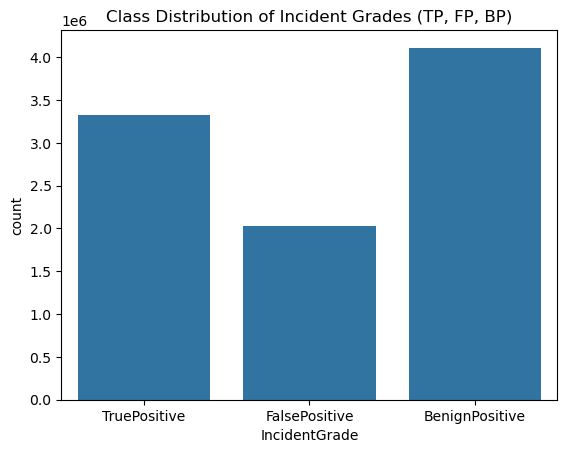

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=df)
plt.title("Class Distribution of Incident Grades (TP, FP, BP)")
plt.show()


EQUALLY SAMPLING

In [26]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['IncidentGrade'] == 'BenignPositive']
df_middle   = df[df['IncidentGrade'] == 'TruePositive']
df_minority = df[df['IncidentGrade'] == 'FalsePositive']

# Set desired number of samples (e.g., equal to the minority class)
n_samples = len(df_minority)

# Downsample the majority and middle classes
df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # without replacement
                                   n_samples=n_samples, 
                                   random_state=42)

df_middle_downsampled = resample(df_middle, 
                                 replace=False,     
                                 n_samples=n_samples, 
                                 random_state=42)

# Combine the downsampled data with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_middle_downsampled, df_minority])

# Shuffle the resulting dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced['IncidentGrade'].value_counts())


IncidentGrade
FalsePositive     2031967
TruePositive      2031967
BenignPositive    2031967
Name: count, dtype: int64


In [27]:


# Randomly sample 25%
sampled_df = df_balanced.sample(frac=0.25, random_state=42)  # Set random_state for reproducibility

# Now you can train on sampled_df


ENCODING

In [45]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Assume your 25% sample is already in 'sampled_df'
df_encoded = sampled_df.copy()

# List of object-type columns (categorical)
cat_cols = [
    'Timestamp', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'
]

# Add int64 columns that should be treated as categorical
more_cat_cols = [
    'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
    'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
    'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
    'RegistryValueData', 'ApplicationId', 'ApplicationName',
    'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
    'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'
]

# Combine all categorical columns
all_cat_cols = cat_cols + more_cat_cols

# Dictionary to store label encoders for each column (optional, for inverse_transform later)
label_encoders = {}

# Apply Label Encoding
for col in all_cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # ensure input is string
    label_encoders[col] = le  # store encoder

# Now 'df_encoded' has all categorical columns encoded as numbers

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


TRAIN,TEST SPILIT

In [30]:
from sklearn.model_selection import train_test_split

X = sampled_df.drop(columns=['IncidentGrade'])
y = sampled_df['IncidentGrade']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


FEATURES RELATED TO TARGET SELECTION

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use only numeric columns for feature selection
X_train_numeric = X_train.select_dtypes(include=['number'])

# Apply SelectKBest to choose top 10 features
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X_train_numeric, y_train)

# Get selected feature names
selected_features = X_train_numeric.columns[selector.get_support()]
print("Top 15 selected features:", selected_features.tolist())


Top 15 selected features: ['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Sha256', 'IpAddress', 'AccountObjectId', 'DeviceName', 'NetworkMessageId', 'FileName', 'FolderPath', 'CountryCode', 'State', 'City']


DECISION TREE CLASSIFIER

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# 2. Fit the model
clf.fit(X_train_numeric[selected_features], y_train)

# 3. Predict on validation set
y_pred = clf.predict(X_val[selected_features])

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)    


Accuracy: 0.9762430486064404

Classification Report:
                 precision    recall  f1-score   support

BenignPositive       0.98      0.97      0.98    101406
 FalsePositive       0.97      0.98      0.97    101820
  TruePositive       0.98      0.98      0.98    101569

      accuracy                           0.98    304795
     macro avg       0.98      0.98      0.98    304795
  weighted avg       0.98      0.98      0.98    304795



###XG_BOOST

In [41]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)


In [43]:
# Convert 'Timestamp' in validation set
X_val['Timestamp'] = pd.to_datetime(X_val['Timestamp'])

# Extract datetime features for validation set
X_val['Hour'] = X_val['Timestamp'].dt.hour
X_val['DayOfWeek'] = X_val['Timestamp'].dt.dayofweek
X_val['Month'] = X_val['Timestamp'].dt.month

# Drop the original timestamp
X_val = X_val.drop(columns=['Timestamp'])

# Now ensure numeric-only columns
X_val_numeric = X_val.select_dtypes(include=['number'])


In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_numeric, y_train_encoded)

# Predict
y_pred_encoded = xgb_clf.predict(X_val_numeric)
y_pred = le.inverse_transform(y_pred_encoded)

# # Evaluate
# print("Accuracy:", accuracy_score(y_val, y_pred))
# print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


C:\Users\VINOTH\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:59:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9084794698075755

Classification Report:
                 precision    recall  f1-score   support

BenignPositive       0.89      0.91      0.90    101406
 FalsePositive       0.89      0.92      0.91    101820
  TruePositive       0.94      0.89      0.92    101569

      accuracy                           0.91    304795
     macro avg       0.91      0.91      0.91    304795
  weighted avg       0.91      0.91      0.91    304795


Confusion Matrix:
 [[92129  6354  2923]
 [ 5130 94105  2585]
 [ 5894  5009 90666]]
